# DAT210x - Programming with Python for DS

## Module6- Lab5

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Useful information about the dataset used in this assignment can be [found here](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names).

Load up the mushroom dataset into dataframe `X` and verify you did it properly, and that you have not included any features that clearly shouldn't be part of the dataset.

You should not have any doubled indices. You can check out information about the headers present in the dataset using the link we provided above. Also make sure you've properly captured any NA values.

In [4]:
# .. your code here ..
X = pd.read_csv('Datasets/agaricus-lepiota.data',index_col=None, header=None, na_values='?')
X.columns=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [5]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
4196,p,x,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
4200,p,x,y,n,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
4283,e,f,s,p,t,n,f,c,b,e,...,s,w,w,p,w,t,e,w,c,w
4291,e,k,s,p,t,n,f,c,b,e,...,s,w,e,p,w,t,e,w,c,w
4326,e,x,y,r,f,n,f,c,n,p,...,f,w,w,p,w,o,f,h,v,d


For this simple assignment, just drop any row with a nan in it, and then print out your dataset's shape:

In [6]:
# .. your code here ..
X.dropna(inplace=True)
X.shape

(5644, 23)

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we presented you in Module 5, using `canadian:0`, `kama:1`, and `rosa:2`.

In [7]:
# .. your code here ..
y = X['class']
X.drop(columns=['class'],inplace=True)

Encode the entire dataframe using dummies:

Split your data into `test` and `train` sets. Your `test` size should be 30% with `random_state` 7.

Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [8]:
# .. your code here ..
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

Create an DT classifier. No need to set any parameters:

In [9]:
# .. your code here ..
dtree = tree.DecisionTreeClassifier()

Train the classifier on the `training` data and labels; then, score the classifier on the `testing` data and labels:

In [10]:
# .. your code here ..
dtree.fit(X_train,y_train)
score = dtree.score(X_test,y_test)

In [11]:
print("High-Dimensionality Score: ", round((score*100), 3))

High-Dimensionality Score:  100.0


In [12]:
X.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a',
       'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-

Use the code on the course's SciKit-Learn page to output a .DOT file, then render the .DOT to .PNGs.

You will need graphviz installed to do this. On macOS, you can `brew install graphviz`. On Windows 10, graphviz installs via a .msi installer that you can download from the graphviz website. Also, a graph editor, gvedit.exe can be used to view the tree directly from the exported tree.dot file without having to issue a call. On other systems, use analogous commands.

If you encounter issues installing graphviz or don't have the rights to, you can always visualize your .dot file on the website: http://webgraphviz.com/.

In [13]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)

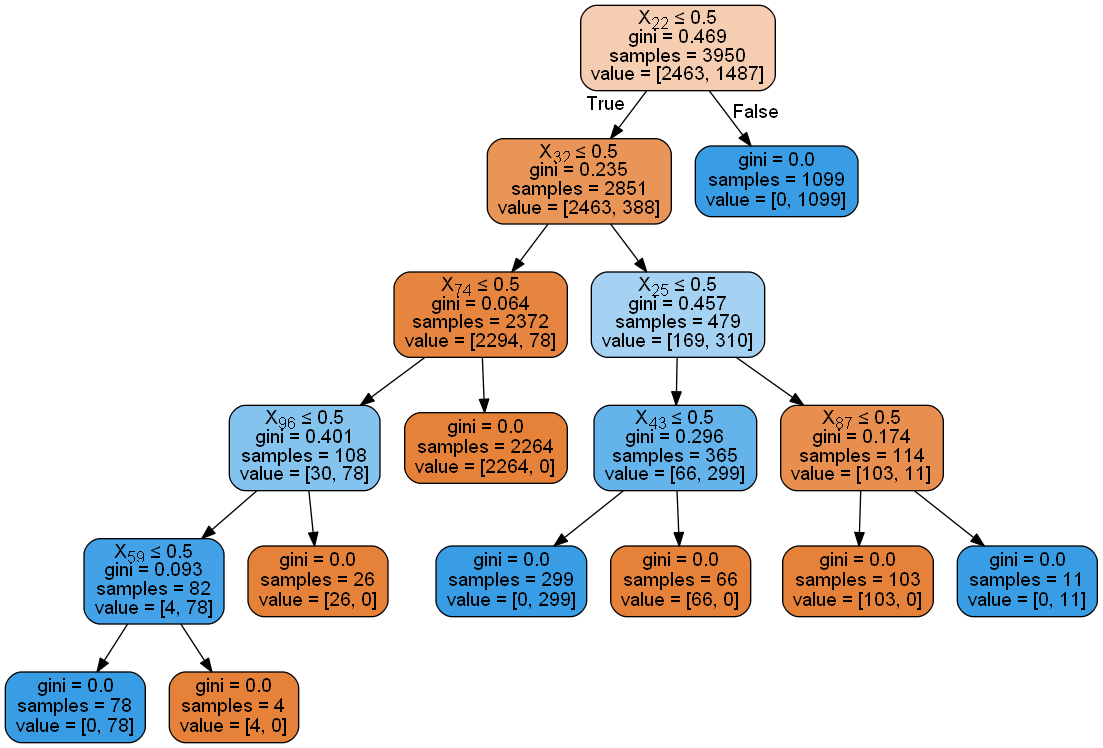

In [14]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

In [17]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
